<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/implementation/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.2721
Epoch 2/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2668
Epoch 3/100
1/1 [==============================] - 0s 111ms/step - loss: 0.2605
Epoch 4/100
1/1 [==============================] - 0s 88ms/step - loss: 0.2539
Epoch 5/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2461
Epoch 6/100
1/1 [==============================] - 0s 86ms/step - loss: 0.2357
Epoch 7/100
1/1 [==============================] - 0s 82ms/step - loss: 0.2261
Epoch 8/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2136
Epoch 9/100
1/1 [==============================] - 0s 60ms/step - loss: 0.1974
Epoch 10/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1810
Epoch 11/100
1/1 [==============================] - 0s 49ms/step - loss: 0.1590
Epoch 12/100
1/1 [==============================] - 0s 49ms/step - loss: 0.1334
Epoch 13/100
1/1 [==============================] 

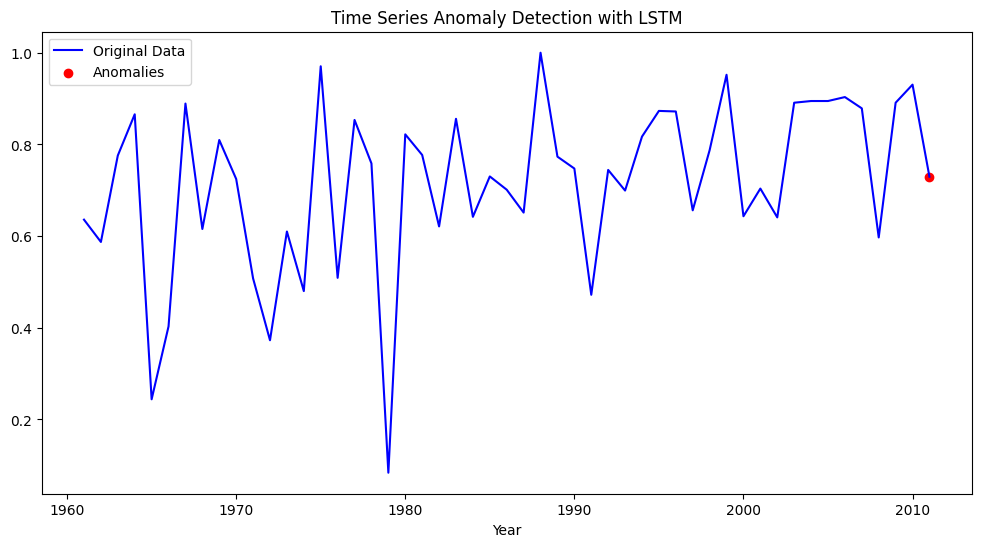

Detected anomalies: [2011]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from tensorflow.keras.losses import Huber
from scipy.stats import zscore

# Load and preprocess the data
data = pd.read_csv("/content/India_GDP_Data.csv")  # Replace with your data file
years = data['Year'].values
data = data['Percentage_Growth '].values
data = data.reshape(-1, 1)  # Reshape to a 2D array

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Create sequences and labels for training
sequence_length = 10  # Adjust as needed
sequences = []
labels = []
for i in range(len(data) - sequence_length):
    sequence = data[i:i+sequence_length]
    label = data[i+sequence_length]
    sequences.append(sequence)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)

# Build an LSTM autoencoder model with dropout
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))  # Increase number of neurons
model.add(Dropout(0.2))  # Add dropout
model.add(LSTM(50, activation='relu', return_sequences=False))
model.add(Dropout(0.2))  # Add dropout
model.add(RepeatVector(sequence_length))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Add dropout
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))  # Add dropout
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss=Huber())  # Use Huber loss

# Train the model on full data
model.fit(sequences, labels, epochs=100, batch_size=64)

# Make predictions on all data
predictions = model.predict(sequences)

# Calculate reconstruction errors on all data
errors = np.mean(np.abs(predictions - sequences), axis=1)

# Define a threshold for anomaly detection using z-score of errors of all data
errors_zscore = zscore(errors)
threshold = 1.96

# Detect anomalies on all data using z-score
anomalies = np.where(errors_zscore > threshold)[0]

# Visualize the results on all data
plt.figure(figsize=(12, 6))
plt.plot(years[sequence_length:], data[sequence_length:], label='Original Data', color='blue')
plt.scatter(years[anomalies + sequence_length], labels[anomalies], color='red', label='Anomalies')
plt.legend()
plt.title('Time Series Anomaly Detection with LSTM')
plt.xlabel('Year')
plt.show()

# Print the detected anomalies on all data
print("Detected anomalies:", years[anomalies + sequence_length])
